# Python machine learning
<hr>

In this chapter, we explain how to perform some machine leanrning methods using Python. Rather than delving into the theoretical and computational details of those methods, we aim to provide intuitive, visual explanations that are easy to understand.

One key machine leanring library in Python is `scikit-learn`, which focuses on some classical machine lenarning methods such as linear regression, supoport vector machine, random forest, clustring, and so on. 

Install it using `pip install`:

```dos
pip install scikit-learn
```

When we use this library in Python, its name is `sklearn`.

Another widely used marchine learning library is `PyTorch`, which is deep learning framework and build some deep learning networks like RNN, CNN, Transformer, and so on.

## Linear regression
<hr>

linear regression is a model that estimates the relationship between a scalar `response` (dependent variable) and one or more `explanatory variables` (regressor or independent variable). 

Linear regression is widely used in biological and social sciences to describe possible relationships between variables. It ranks as **one of the most important tools** used in these disciplines.

For example, for a seaborn dataset "car_crashes", which contains data on car crashes in different U.S. states.

In [1]:
import seaborn as sns

crashes = sns.load_dataset('car_crashes')
crashes.head()  

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Descriptions for each column are below:

| Variable Name       | Description                                                                  |
| ------------------- | ---------------------------------------------------------------------------- |
| `total`             | Total number of car crash deaths per 10,000 people in each state             |
| `speeding`          | Proportion of deaths due to speeding (as a fraction of `total`)              |
| `alcohol`           | Proportion of deaths involving alcohol (as a fraction of `total`)            |
| `not_distracted`    | Proportion of deaths not caused by distraction                           |
| `no_previous`       | Proportion of drivers involved in fatal crashes with no prior violations |                   
| `ins_premium`       | Alternative column for insurance premium  |
| `ins_losses`        | Average insurance losses per driver (in US dollars)                          |
| `abbrev`            | Two-letter abbreviation of the US state                                      |


A scatter plot for the speeding and total number of crashes is given below.

<Axes: xlabel='speeding', ylabel='total'>

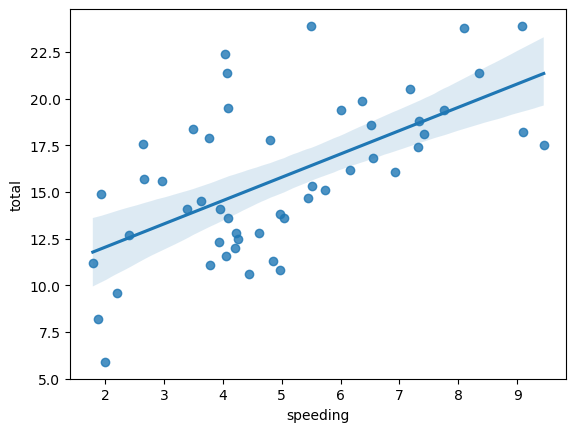

In [2]:
sns.regplot(data=crashes, x="speeding", y="total")

 We may assume there is a linear relationship between the amount of total crashes and the speeding, i.e., 

```{math}
:label: eq-single-variable
\text{total}=\beta_0+\beta_1\text{ speeding}
```

Geometrically, linear regression involves finding **the best-fitting line through a set of points**, represented by a linear equation as shown above, where $\beta_0$ is called the `intercept`.

The most common way to comute the linear regreesion model is by the ordinary least square method, for which we can use the function `OLS()` from the library `Statsmodels`. 

Using the `statsmodels` library to perform regression typically involves the following steps:

* Construct the regression model using the function `OLS()` and `fit()`.
* Output the regression results using the `summary()` function.
* Obtain predicted values using the `predict()` function. This step can be omitted if not for prediction.


In the following code, we build a linear model for the equation {eq}`eq-single-variable` using `statsmodels.formula.api`.

In [3]:
import statsmodels.formula.api as sm

# the linear model is definded by strings the in the formula
model = sm.ols(formula="total ~ speeding", data=crashes).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.87e-06
Time:                        21:08:28   Log-Likelihood:                -132.15
No. Observations:                  51   AIC:                             268.3
Df Residuals:                      49   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5459      1.243      7.680      0.0

There are a lot of information in the output table, but we usually concern several key informations:

- Values of coefficicent $\beta_0, \beta_1, \dots$
  - They are given in the column "coef". From them, we can get the fitted model. For this example, it is:
    
    $$
    \text{tip}=9.5459 +1.2493 \text{ total\_bill}
    $$
    
- p-values of the independent variables.
  - The p-values are given in the column "P>|t|". If the p-value of an independe variable is less than 0.05, it means there is **linear relationship** between the independent variable and the dependent variable at 95% confidence level. For this example, the p-values are all 0.000.
- $R^2$
  - It is given by the value on the right of "R-squred: " at the top right of the table. It measures the proportion of variability in the dependent variable explained by the model, with a range between 0 and 1. **The closer it is to 1, the better the model fit**. For this example, it is 0.374.



In regression analysis, there is no universal threshold for what constitutes a "good" R² value, as it heavily depends on the **field of study and research context**. However, here are some general guidelines:
  - R² > 0.7: Often considered **strong** in social sciences or fields with high noise.  
  - R² = 0.3–0.7: **Moderate** explanatory power (common in economics, biology, etc.).  
  - R² < 0.3: **Weak** fit, but may still be meaningful in noisy domains (e.g., psychology, climate studies).  
  - R² ≈ 0: Model explains almost none of the variability.  

The general syntax for the function `ols()` is given below.

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">statsmodels.formula.api.ols(formula, data)</th>
    </tr>
    <tr>
        <td style="text-align:left">formula</td>
        <td style="text-align:left">Usually a string, the formula specifying the model.</td>
    </tr>
    <tr style="text-align:left; border-bottom:solid" >
        <td style="text-align:left">data</td>
        <td style="text-align:left">Usually a DataFrame or dict, the data for the model</td>
    </tr>
</table>
<br />

The general syntax for the formula is below:

> y ~ x1 + x2 + x1:x2 + C(x3)

- `y` is the dependent (response) variable

- `x1`, `x2`, `x3` are independent (regressor) variables
- `C(x3)` means x3 is catorgorical variable
- `~` separates the dependent variable from the predictors

- `+` adds independent variables

- `-1` removes the intercept (by default it’s included)

- `x1:x2` adds an **interaction term** only, which equals x1*x2

- `x1*x2` adds both main terms and the interaction, which equals x1 + x2 + x1*x2

- Normally in regression, we assume that variables affect the outcome independently. But sometimes, the **combined effect** of two variables is more (or less) than just adding their individual effects — that's where `interaction terms` come in.

For example, we can apply a linear regression between the amount of total crashes, the speeding and the alcohol:

$$
\text{total}=\beta_0+\beta_1\text{ speeding}+\beta_2\text{ alcohol}
$$

In [4]:
import statsmodels.formula.api as smf
import seaborn as sns

crashes = sns.load_dataset('car_crashes')

# the linear model is definded by strings the in the formula
model = smf.ols(formula="total ~ speeding + alcohol", data=crashes).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           2.27e-14
Time:                        21:08:28   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6807      0.957      5.934      0.0

Or, if we consider the interaction of speeding and alcohol (drivers with alcohol tend to driving with highe speed):

$$
\text{total}=\beta_0+\beta_1\text{ speeding}+\beta_2\text{ alcohol}+\beta_3\text{ alcohol*speeding}
$$

In [5]:
import statsmodels.formula.api as smf
import seaborn as sns

crashes = sns.load_dataset('car_crashes')

# the linear model is definded by strings the in the formula
# the below code equals: model = smf.ols(formula="total ~ alcohol*speeding", data=crashes).fit()
model = smf.ols(formula="total ~ speeding + alcohol + alcohol:speeding", data=crashes).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     58.91
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           5.91e-16
Time:                        21:08:28   Log-Likelihood:                -104.31
No. Observations:                  51   AIC:                             216.6
Df Residuals:                      47   BIC:                             224.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.8936      2.236  

For the catogorical variable, we use the dataset "tips" as an example to fit the following equation:

$$
\text{tip}=\beta_0+\beta_1\text{ total\_bill}+\beta_2\text{ day}
$$

In [6]:
import statsmodels.formula.api as smf
import seaborn as sns

tips = sns.load_dataset('tips')

# the linear model is definded by strings the in the formula
model = smf.ols(formula="tip ~ total_bill + C(day)", data=tips).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.67
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           7.52e-31
Time:                        21:08:28   Log-Likelihood:                -350.03
No. Observations:                 244   AIC:                             710.1
Df Residuals:                     239   BIC:                             727.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9205      0.186      4.943

```{note}
Linear regression can also be performed using non-formula-based modeling, non-OLS methods or other libraries, which are omitted here due to space limitations.
```

## Standardize Data
<hr>

`Standardization` is a process of transforming the data to make it more suitable for some statistical analysis or machine learning. 

The main reasons include:

- To remove the effect of different units and scales

  * Variables may have different units (e.g., dollars, percentages, counts).
  * Without standardization, variables with larger scales may dominate the model (especially in regression or distance-based models like KNN, SVM).

- To compare variable importance

  * In regression, standardized coefficients allow you to compare which variable has a stronger effect on the outcome.
 
- To improve model performance

  * Many machine learning models (e.g., gradient descent-based, PCA, K-means) work better when input features are on similar scales.

- To meet assumptions of some statistical tests

  * Some models assume variables are normally distributed or centered around 0, especially in multivariate analysis.

There are two common methods for standardizing data: z-score standardization and min-max standardization

1. **Z-score Standardization** (`StandardScaler`)

Transforms data to have mean ($\mu$) = 0 and standard deviation ($\sigma$) = 1.

$$
z = \frac{x - \mu}{\sigma}
$$

In python, it is easy to standardize the data with the method `fit_transform( )` from `sklearn`.

In [7]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

crashes = sns.load_dataset('car_crashes')
scaler = StandardScaler()
crash_standard = scaler.fit_transform(crashes.iloc[:, 0:-1]) # standar
print(crash_standard[1:10]) # print the first 10 rows

[[ 0.56593556  1.2126951  -0.21131068  0.60853209  0.80725756  0.94325764
  -0.02289992]
 [ 0.68844283  0.75670887  0.18761539  0.45935701  1.03314134  0.0708756
  -0.98177845]
 [ 1.61949811 -0.48361373  0.54740815  1.67605228  1.95169961 -0.33770122
   0.32112519]
 [-0.92865317 -0.39952407 -0.8917629  -0.594276   -0.89196792 -0.04841772
   1.26617765]
 [-0.5366299   0.01692    -0.63009543 -0.63369765 -0.29104195 -0.2914793
   0.22027622]
 [-1.22267063 -0.01511416 -0.5833691  -0.9356316  -1.38129335  1.02964051
   1.32270187]
 [ 0.10040792  0.57951992 -0.01564416  0.1166575   0.54542553  1.42128062
   0.6907692 ]
 [-2.42324191 -1.49769509 -1.92383077 -1.71868879 -2.17430102  2.19175919
   0.06330968]
 [ 0.51693265 -0.62025945  0.17768604  0.64840171  0.7568227   1.54737129
   0.39391538]]


2. **Min-Max Normalization** (0-1 Scaling)

This method scales data to the **\[0, 1]** range.

$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

In [8]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

crashes = sns.load_dataset('car_crashes')
scaler = MinMaxScaler()
crash_standard = scaler.fit_transform(crashes.iloc[:, 0:-1]) # standar
print(crash_standard[1:10]) # print the first 10 rows

[[0.67777778 0.73504832 0.34718769 0.66344003 0.72262679 0.62393111
  0.45684192]
 [0.70555556 0.61608775 0.42806394 0.63303046 0.77737321 0.39042695
  0.24636258]
 [0.91666667 0.29250457 0.50100651 0.88105566 1.         0.28106617
  0.5323574 ]
 [0.33888889 0.31444241 0.20923623 0.41824574 0.31079324 0.35849657
  0.73980184]
 [0.42777778 0.42308697 0.26228538 0.41020958 0.45643693 0.29343805
  0.51022048]
 [0.27222222 0.41472969 0.27175844 0.34865988 0.19219766 0.64705258
  0.75220923]
 [0.57222222 0.56986158 0.38685613 0.56317063 0.65916775 0.75188004
  0.61349638]
 [0.         0.02794463 0.         0.18903246 0.         0.95810844
  0.47576542]
 [0.66666667 0.25685558 0.42605092 0.67156751 0.71040312 0.78562981
  0.54833527]]


- There is no negative values after standarization for this method.

## Principle component analysis (PCA)
<hr>

Principal component analysis (PCA) is a **dimensionality reduction** to simplify a large data set into a smaller set, while preserving their most important structures. 

It represent a transformation of the original variables into a new set of uncorrelated variables through linear combinations. This transformation is structured such that the leading components account for the **maximal possible information (reflected by the data variance)** in the data, effectively compressing the key information into fewer dimensions.

- For example, there are 10 variables in the original data set. We can use PCA to reduce the number of variables to 3 and keep 85% of the original information.

In [9]:
import seaborn as sns

data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


There are 4 variables in addition to the last categorical variable. We use the class `PCA` from the libraray `sklearn` for reducing to 2 varaibles.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_standard = scaler.fit_transform(data.iloc[:, 0:-1])
pca = PCA(n_components=2)  # the number of principal components
pca.fit(iris_standard)  # fit the data by PCA
print(
    f"explained variance of each principal component: {pca.explained_variance_ratio_}"
)  # output the explained variance ratio

principal_components = pca.fit_transform(iris_standard)
print(f"principal components shown the first 10 rows:\n {principal_components[0:10]}")

explained variance of each principal component: [0.72962445 0.22850762]
principal components shown the first 10 rows:
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]]


- It is recommended to standarizing the data before applying PCA.
- Specify the number of principal components through the parameter `n_components` in `PCA( )`.
- Fit the data by PCA through the method `fit( )`.
- Usually, the cumulated explained variance ratio of the specified principal components should be greather equal than 85%.
  - In this example, the cumluated explained variance ratiso is 0.729 + 0.228 = 0.954 > 0.85.

- Get the principal components (the values of the reduced variables) by the method `fit_transform( )`.

```{note}
PCA is generally used as an intermediate step in data analysis. It is often applied for dimensionality reduction before further tasks such as clustering, classification, or visualization.
```

主成分分析的求解一般采用特征根分解，即求解原始数据**协方差矩阵或相关系数矩阵**最大特征根对应的特征向量，即为第一主成分，第二主成分为第二大特征根对应的特征向量，其他的主成分可以依次得出。主成分贡献率为对应特征根占所有特征根加和的比例。

采用 python 主成分分析时，常用的包为 sklearn，其他一些包也能做（例如 matplotlib.mlab.PCA）。需要注意的是

- 最好对原始数据进行标准化
- sklearn 计算主成分时使用的是协方差矩阵，而不是相关系数矩阵

sklearn 中的标准化函数有：


|函数|描述|
|:--|:--|
scale(X, axis=0, *)|对数据 X 进行 z 标准化，参数 axis 调整对列或对行标准化
StandardScaler()| z 标准化，列标准化
MinMaxScaler()| 最大最小标准化，列标准化
MaxAbsScaler()| 最大绝对值标准化，列标准化
... ...|


举例，下面一个统计数据：

|      | 食品    | 衣着   | 居住    | 家庭设备 | 交通通讯 | 文教娱乐 | 医疗保健 | 其他   |
|------|-------|------|-------|------|------|------|------|------|
| 北  京 | 1736  | 379  | 854   | 327  | 615  | 797  | 504  | 103  |
| 天  津 | 1171  | 257  | 614   | 117  | 328  | 329  | 179  | 40   |
| 河  北 | 888   | 156  | 399   | 101  | 222  | 226  | 135  | 39   |
| 山  西 | 830   | 202  | 201   | 69   | 160  | 280  | 103  | 33   |
| 内蒙古  | 1054  | 150  | 335   | 84   | 293  | 309  | 176  | 44   |
| 辽  宁 | 1127  | 221  | 378   | 100  | 301  | 377  | 234  | 68   |
| 吉  林 | 1003  | 168  | 257   | 82   | 285  | 261  | 194  | 56   |
| 黑龙江  | 924   | 184  | 527   | 74   | 257  | 277  | 254  | 49   |
| 上  海 | 2684  | 366  | 1320  | 458  | 748  | 937  | 562  | 204  |
| 江  苏 | 1569  | 191  | 512   | 168  | 364  | 479  | 199  | 85   |
| 浙  江 | 2061  | 319  | 914   | 260  | 618  | 723  | 416  | 121  |
| 安  徽 | 1000  | 117  | 345   | 106  | 197  | 257  | 134  | 41   |
| 福  建 | 1518  | 187  | 457   | 154  | 366  | 357  | 154  | 100  |
| 江  西 | 1221  | 125  | 326   | 96   | 230  | 276  | 155  | 56   |
| 山  东 | 1088  | 160  | 446   | 137  | 294  | 377  | 188  | 46   |
| 河  南 | 859   | 132  | 318   | 83   | 160  | 178  | 123  | 39   |
| 湖  北 | 1192  | 125  | 310   | 110  | 223  | 272  | 135  | 62   |
| 湖  南 | 1433  | 128  | 307   | 114  | 219  | 329  | 168  | 58   |
| 广  东 | 1789  | 144  | 530   | 152  | 412  | 361  | 204  | 116  |
| 广  西 | 1187  | 79   | 380   | 95   | 214  | 226  | 123  | 44   |
| 海  南 | 1135  | 66   | 146   | 92   | 178  | 199  | 93   | 60   |
| 重  庆 | 1130  | 96   | 231   | 96   | 163  | 250  | 143  | 33   |
| 四  川 | 1244  | 116  | 234   | 102  | 172  | 225  | 144  | 36   |
| 贵  州 | 820   | 80   | 236   | 62   | 99   | 161  | 72   | 24   |
| 云  南 | 976   | 80   | 226   | 67   | 100  | 183  | 122  | 35   |
| 西  藏 | 1185  | 182  | 84    | 81   | 79   | 28   | 44   | 39   |
| 陕  西 | 813   | 124  | 212   | 84   | 163  | 297  | 166  | 38   |
| 甘  肃 | 859   | 92   | 241   | 74   | 155  | 258  | 114  | 27   |
| 青  海 | 893   | 156  | 329   | 84   | 208  | 110  | 152  | 43   |
| 宁  夏 | 923   | 143  | 346   | 77   | 178  | 178  | 199  | 51   |
| 新  疆 | 804   | 171  | 333   | 68   | 183  | 159  | 169  | 36   |


主成分分析的 Python 代码为：

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
df = pd.read_excel("datas/data-pca.xlsx", index_col=0)  # 读取数据
data = scale(df.values)  # z标准化，标准化之后就自动根据协方差矩阵进行主成分分析了
# data2 = np.corrcoef(np.transpose(data)) # 没有必要单独计算协方差阵或相关系数阵
pca = PCA(n_components=3)  # 可以通过参数 n_components 调整主成分个数
pca.fit(data)
print("特征根：", pca.explained_variance_)  # 输出特征根
print()
print("主成分：", pca.components_)  # 输出主成分

特征根： [7.32679152 0.46898546 0.16208403]

主成分： [[ 0.34197826  0.32541509  0.36029958  0.36486138  0.3682146   0.36096996
   0.35616496  0.34854195]
 [-0.54451489  0.61527353  0.11520953 -0.11674732  0.03494752  0.07480108
   0.2943857  -0.4522824 ]
 [ 0.27960446  0.69192655 -0.19973533 -0.07235855 -0.02963776 -0.42452329
  -0.39881297  0.24037227]]


## Clustering
<hr>

Kmeans 是一种动态聚类方法，其基本思想是：首先随机选取 K 个点作为初始凝聚点，按照距离最近原则划分为 K 类；然后重新计算 K 个类的重心作为新的凝聚点，再按照距离最近原则重新分类；重复这一过程，直到重心不再变化为止。

对上面的例子，进行 Kmeans 聚类并画图的代码为：

[2 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
类别1
['天  津', '河  北', '山  西', '内蒙古', '辽  宁', '吉  林', '黑龙江', '江  苏', '安  徽', '福  建', '江  西', '山  东', '河  南', '湖  北', '湖  南', '广  东', '广  西', '海  南', '重  庆', '四  川', '贵  州', '云  南', '西  藏', '陕  西', '甘  肃', '青  海', '宁  夏', '新  疆']
类别2
['上  海']
类别3
['北  京', '浙  江']


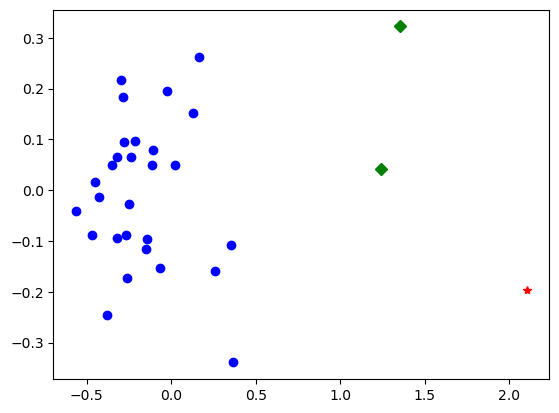

In [12]:
import warnings

warnings.filterwarnings("ignore")  # 忽略掉使用默写函数的一些警告信息

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
# 将上述数据放到 excel 里，并用 pandas 读取
df = pd.read_excel("datas/data-pca.xlsx", index_col=0)

scale_values = MinMaxScaler().fit_transform(df.values)  # 数据表转化预处理

kmeans = KMeans(n_clusters=3).fit(scale_values)  # 分为 3 类, 参数 n_init= 'auto' 设置初始聚类的运行次数
print(kmeans.labels_)  # 输出判别结果列表

# 具体输出判别结果
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i, j in enumerate(kmeans.labels_):
    if j == 0:
        cluster_1.append(df.index[i])
    elif j == 1:
        cluster_2.append(df.index[i])
    else:
        cluster_3.append(df.index[i])
print("类别1")
print(cluster_1)
print("类别2")
print(cluster_2)
print("类别3")
print(cluster_3)

# draw pictures by tsne, or pca, 利用主成分降为 2 维，并画图显示分类结果
# from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tsne = PCA(n_components=2).fit_transform(scale_values)  # tsne
df2 = pd.DataFrame(tsne)
df2["labels"] = kmeans.labels_

df_1 = df2[df2["labels"] == 0]
df_2 = df2[df2["labels"] == 1]
df_3 = df2[df2["labels"] == 2]

# 画图
plt.plot(df_1[0], df_1[1], "bo", df_2[0], df_2[1], "r*", df_3[0], df_3[1], "gD")
plt.show()

## Artificial neural network
<hr>


神经网络的目标是：找到一个能把一组输入最好地映射到其正确输出的函数。例如一个简单的分类任务，其中输入是动物的图像，正确的输出将是动物的名称。或者根据历史需求数据，预测未来一期的需求。神经网络的思想类似回归分析中经常用到的拟合，都用到了最小二乘的思想：数学意义上的决策目标是：选取一些参数（神经网络中每个输入的权重），使得拟合的输出与期望输出的误差平方和最小。

下面是一个神经网络示意图（输入层有一些神经元，隐含层有一些神经元，输出层有一些神经元），输入信息经过正向传播到输出，计算实际输出与期望输出的误差后，在反向传播误差；重复这个过程，在传播过程中，不断减少误差，直到误差减少到一定程度终止。

![ann.png](_build/html/_images/ann.png)

用 BP 神经网络预测 sklearn 包中自带的乳腺癌数据例子：

In [13]:
# 测试一下癌症数据
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

cancer = datasets.load_breast_cancer()
cancer_data = cancer["data"]
cancer_target = cancer["target"]

# 将数据集划分为训练集，测试集
(
    cancer_data_train,
    cancer_data_test,
    cancer_target_train,
    cancer_target_test,
) = train_test_split(cancer_data, cancer_target, test_size=0.2)

# 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)

# 建立 BP 模型
bpnn = MLPClassifier(
    hidden_layer_sizes=(20, 10),  # 神经元隐含层的大小
    max_iter=200,
    solver="adam",
    random_state=45,
)
bpnn.fit(cancer_trainStd, cancer_target_train)

# 预测
y_pred = bpnn.predict(cancer_testStd)  # 返回预测结果
print("神经网络预测结果评价报告：\n", classification_report(cancer_target_test, y_pred))

神经网络预测结果评价报告：
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        40
           1       0.96      0.99      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



其他常见的机器学习方法，例如随机森林，支持向量机，梯度提升等，都可以在`sklearn`库中找到相应的函数。

## Exercises
<hr>

```{exercise}
:label: regression
使用python 中的`statsmodels`库或`sklearn`库，编程实现《统计学》或《计量经济学》课程上的一些数据分析习题。

```

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>